## Exercises

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys

def show_img(window_name, img):
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Q1
Load and display the image 'dog.jfif'. Save the image in png format

In [2]:
dog = cv.imread("images/dog.jfif")

cv.imshow("original",dog)

cv.waitKey(0)  # key binding function: wait for user input
cv.destroyAllWindows()

if dog is None:
    sys.exit("Not a valid filepath")
    
cv.imshow('dog', dog)
k = cv.waitKey() & 0xFF

if k == 27: 
    cv.imwrite('dog_save.jpg', dog)
    
cv.destroyAllWindows()

### Q2
Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from
your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images
are original color image and its corresponding grayscale image.


In [3]:
# method 1: call cv.imshow() twice
img = cv.imread("images/lena.jfif", 1)
grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('color', img)
cv.imshow("grayscale", grayscale)

cv.waitKey(0)
cv.destroyAllWindows()

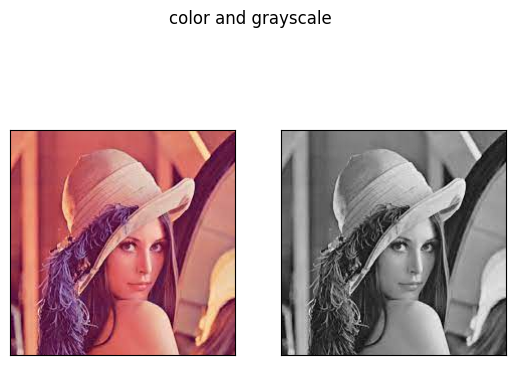

In [4]:
# method 2: using matplotlib module

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color and grayscale")
plt.show()

In [5]:
# method 3: concatenate (join array)

gray = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR) # make it same dimension
img_combined = np.hstack((img, gray))
show_img("color vs grayscale", img_combined)

### Q3
Write codes that performs the following:

<li>Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with
smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary
frame rate.</li>
<br>
<li>Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"</li>

In [6]:
video = cv.VideoCapture("videos/img_pexels.mp4")
height = int(video.get(4))
width = int(video.get(3))
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
resize_vid = cv.VideoWriter("videos/smaller_img_pexels.avi", fourcc , 60.0, (int(0.5*width), int(0.5*height)))

if video.isOpened() == False:
    raise Exception("No video detected")

while video.isOpened():
    ret, frame = video.read() # read method return a tuple with (boolean, video frame)
    
    if not ret: # if the boolean (ret) is False
        print("cannot receive frame")
        break
    
    
    # resize to 1/2 of the original size
    frame_resize = cv.resize(frame, None, fx = 0.5, fy = 0.5, interpolation=cv.INTER_LINEAR)

    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow("frame", frame_resize)

    resize_vid.write(frame_resize) # write video using the resized frame of original video
    
    if cv.waitKey(1) & 0xFF == 27: # check for user input for each frame
        break

resize_vid.release()
video.release()
cv.destroyAllWindows()

### Q4
Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 2) Cubic interpolation and
3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.

In [7]:
dog_image = cv.imread("images/dog.jfif")

# original size of the image
cv.imshow("original size", dog_image)

cv.waitKey(0)
cv.destroyAllWindows()

#### Resize using different method

In [8]:
# resize using linear interpolation
dog_resize_1 = cv.resize(dog_image, None, fx = 1.5, fy = 1.5, interpolation=cv.INTER_LINEAR)

# resize using cubic interpolation
dog_resize_2 = cv.resize(dog_image, None, fx = 1.5, fy = 1.5, interpolation=cv.INTER_CUBIC)

# resize using nearest neighbour interpolation
dog_resize_3 = cv.resize(dog_image, None, fx = 1.5, fy = 1.5, interpolation=cv.INTER_NEAREST)

#### Display images and compare

In [9]:
# display and compare the image
cv.imshow("Resized linear interpolation",dog_resize_1)
cv.imshow("Resized cubic interpolation",dog_resize_2)
cv.imshow("Resized nearest neighbour interpolation",dog_resize_3)

cv.waitKey(0)
cv.destroyAllWindows()

#### Comment:

1) linear interpolation
- slight drop of image quality compare to original image
- best image quality after enlarge 1.5x

2) cubic interpolation
- image quality stays between linear interpolation and nearest neighbour interpolation

3) nearest neighbour interpolation
- worst image quality after enlarged 1.5x 